# ---------------------------------- DATA MAPPING & EDA  ---------------------------------------

## OBJECTIVES OF THIS NOTEBOOK:
* **Local data analysis** explore relationship between columns within same table (same entity) -- If no time then skip
* **Data mapping/Data Checking** data mapping to examine relationship between features of global data and answer questions/objectives in Methodology
* **Visualize/Summarize Data**: Visualize/Summarize relationship between features and relevant metrics
* **Dashboard Design** Identify relevant graph & metrics for Dashboard 

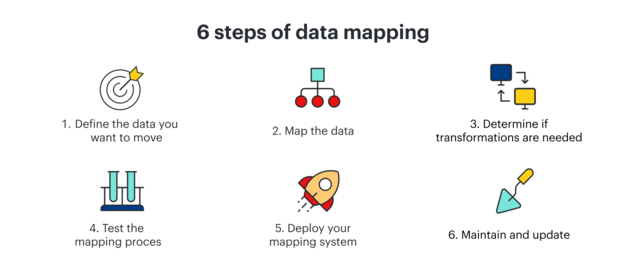

In [1]:
from IPython.display import Image,display
display(Image(filename='D:\ProgramsX\Project\ds1st\OneMount\images\datamappingsteps.png', width=1000))

# Example data visualization

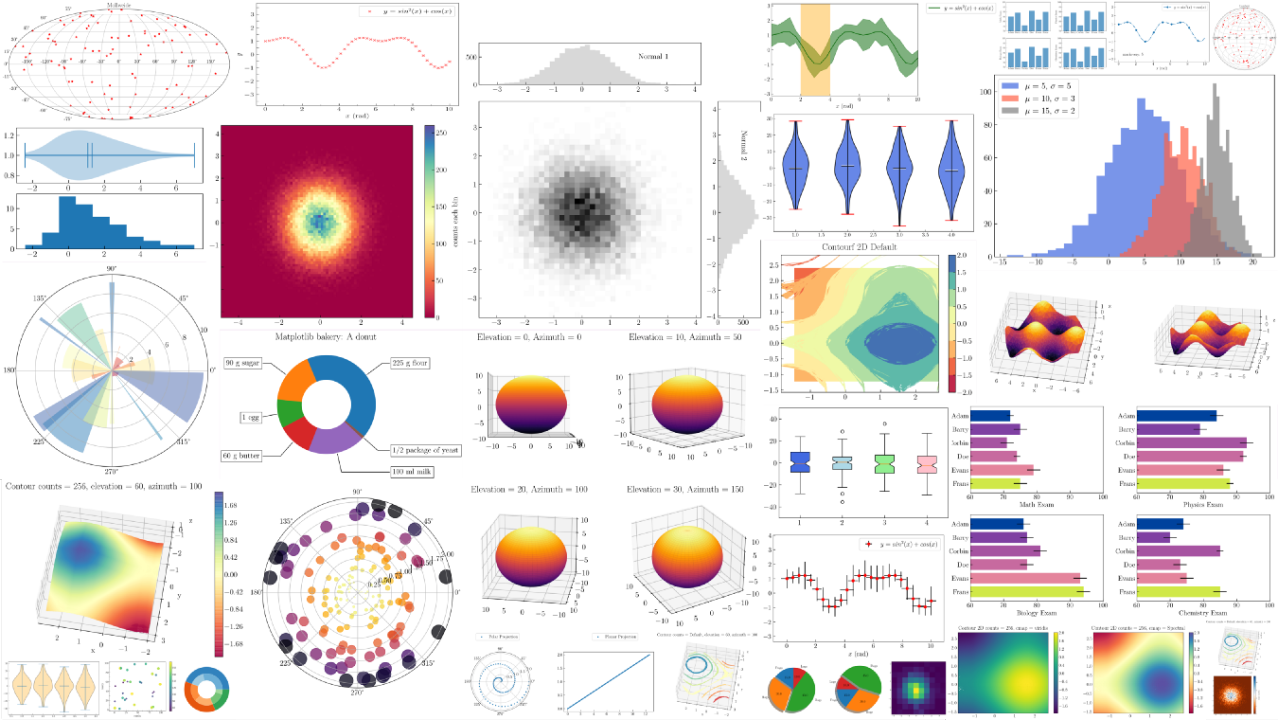

In [2]:
display(Image(filename='D:\ProgramsX\Project\ds1st\OneMount\images\datavisualization.png', width=800, height=700))

## Importing Lirary

In [3]:
# OS 
import os
import pathlib
import warnings

# Excel manipulator (Install openpyxl first)
import openpyxl

# Data Manipulation
import pandas as pd
import numpy as np
import scipy.stats
import datetime 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 

In [4]:
# System setting
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 100

# Overview

### Load datasets into notebooks

In [5]:
# Chang dir to folder that hold data
os.getcwd()
os.chdir(r'D:\\ProgramsX\\Project\\ds1st\\OneMount\\data\\clean_data')

In [6]:
# Recursively list all files in the directory and subdirectories
all_files = [file.name for file in pathlib.Path(r'D:\\ProgramsX\\Project\\ds1st\\OneMount\\data\\clean_data').rglob('*') if file.is_file()]
all_files

['d_merchant.pkl',
 'd_scheme.pkl',
 'd_user.pkl',
 'd_voucher.pkl',
 'fact.pkl',
 'summary_table.pkl']

In [7]:
# Load file
df_mer,df_sc,df_user,df_vc,df_fct,summary_table = [pd.read_pickle(file) for file in [name for name in all_files if '.pkl' in name]]

In [8]:
df_fct.dtypes

TRANSACTION_ID              int64
SERIAL_NUMBER              object
VOUCHER_CODE               object
VOUCHER_NAME               object
AVAILABLE_FROM     datetime64[ns]
AVAILABLE_TO       datetime64[ns]
MERCHANT_CODE              object
ACTION                     object
CALENDAR_DIM_ID    datetime64[ns]
USER_ID                    object
dtype: object

### Objective 1: Assess Voucher Operation
**Questions:**
1. How many vouchers are currently active?
2. is the redemption rate of vouchers?
3. What are the overall claim and redemption rates for vouchers?
4. How do these rates vary over time?
5. What is the average discount of redeemed vouchers, and how does it influence redemption rates?
6. Does the validity period of vouchers affect their claim and redemption rates?

**Metrics:**
- Total vouchers issued, claimed, and redeemed.
- Number of active/expired vouchers (calculated from `voucher` table using `display_date_from` and `display_date_to`)
- Claim rate = (Total claimed vouchers / Total issued vouchers) * 100.
- Redemption rate = (Total redeemed vouchers / Total claimed vouchers) * 100.
- Average discount amount and percentage = Sum of `discount_amount` or `discount_percent` from the `scheme` table for redeemed vouchers.
- Average validity period of vouchers.
- Claim and redemption rates segmented by time (daily, weekly, monthly).

**Combinations of Features:**
- Join `fact`, `voucher`, and `scheme` tables using `VOUCHER_CODE`.
- Analyze voucher usage across demographics by incorporating the `user` table.

**Approach:**
- Aggregate the number of claimed and redeemed vouchers from the `fact` table.
- Calculate the claim-to-redemption ratio by dividing the total number of redeemed vouchers by the total number of claimed vouchers.
- Determine active and expired vouchers using the `voucher` table's `display_date_to` and `available_to` columns.
- Use voucher usage rate to understand the effectiveness of the vouchers.


## Note 
- Total voucher issued, claimed and redeemed: (claim,redeemed) and issued are on different table -> Check date range using summary data and histogram
- Actual active period is only 2 month: January and February of 2024 -> Focus on these 2 months performance
- First chart: time series (line plot) of user total activities each day (claimed, redeemed) in the 2 month. Table (fact) only
- Second chart: same as first chart but divide into 2 category: claimed and redeemed

### Answer to questions:
1) Overview of portfolio `through time`: Total issued of portfolio (Voucher stock). Date start of first voucher (display to). Divided by I) (Active/Inactive), II) category, subcategory, discount_type, merchandise, III) discount detail (percent/amount, average discount value, average discount%...) + Average validity period of vouchers.
2) Overview of `current` portfolio in the 2 month: same as 1) + claimed, redeemed + claimed rate,redemption rate. Fluctuation by month, week, day -> calculated different in % or number and display the increase/decrease for trend.

In [9]:
summary_table[summary_table.lst_dtype == np.dtype('datetime64[ns]')]

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%,org_rng_min,org_rng_max,lst_rng_min,last_rng_max,quantile_50,quantile_70,quantile_90,str_min_len,str_max_len,freq_value,freq_cnt,%freq
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,93,0.0306,93.0000,0.0306,2020-09-12 14:34:00,2024-02-06 10:00:00,2020-09-12 14:34:00,2024-02-06 10:00:00,2024-01-02 10:00:00,2024-01-19 10:00:00,2024-02-01 10:00:00,NaN,NaN,NaN,NaN,NaN
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,62,0.0204,62.0000,0.0204,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-02-29 23:59:00,2024-05-20 23:59:00,2024-12-31 23:59:00,NaN,NaN,NaN,NaN,NaN
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,60,0.0197,60.0000,0.0197,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-01-31 00:00:00,2024-02-10 00:00:00,2024-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN
17,display_date_from,d_voucher,4,317,0,0,datetime64[ns],datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,106,33.4385,106.0000,33.4385,2020-09-12 14:34:00,2024-03-30 10:00:00,2020-09-12 14:34:00,2024-03-30 10:00:00,2023-12-27 10:00:00,2024-01-20 10:00:00,2024-03-06 10:00:00,NaN,NaN,NaN,NaN,NaN
18,display_date_to,d_voucher,4,317,0,0,datetime64[ns],datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,73,23.0284,73.0000,23.0284,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-03-31 23:59:00,2024-05-23 04:47:00,2024-12-31 23:59:00,NaN,NaN,NaN,NaN,NaN


In [10]:
df_fct['CALENDAR_DIM_ID'].min()

Timestamp('2024-01-01 00:00:00')

## Full Data Analysis
> `Reason` for Full Data Analysis: Assume real project - these data would be all the data that we have during our operation. It makes sense to evaluate the full overall situation despite having only 2 month of activity data

# Tối ưu mapping (tránh duplicates)
- Tách nhóm MERCHANT_CODE = 'xXC' vì không map được do có quá nhiều lặp -> Bỏ khỏi report để đảm bảo đồng bộ giữa báo cáo


# Subject (for analyze)
1) action: claimed, redeemed 
2) unique_customer: user_id (for analysis of preference)
3) scheme: discount_type
4) voucher: stock 
5) merchant: category, sub category

# Main Metrics:
1) Total issue/stock, claimed, redeemed 
2) Claimed rate = (total claimed/total issued)
3) Redeemed rate = total redeemed/total claimed

# Sub Metrics:
4) Average discount amount/percent

# Segmentation
1) action: claimed/redeemed
2) category, subcategory
3) scheme
4) customer demographic: age, province, gender

# Paring
### Question 1: How is the voucher feature doing overall?
1) Segmentaion: action(claimed/redeemed)
> metrics: 1 - 2 - 3
> 
> function: min,max,mode,sum,average 
> 
> group by: time (all, by day/week/month)
### Question 2: Which category, sub category, voucher is performing well/best performing?
2) Segmentation: category, sub category
> metrics: 1 - 2 - 3 - 4
> 
> function: mim, max, mode, sum , average
> 
> group by: category/sub category + time (all, by day/week/month)
### Question 3: Which category, sub category, voucher is suitable for which customer segmention?
3) Segmentation: customer
> metrics: 1 - 2 - 3 - 4
> 
> function: mim, max, mode, sum , average
> 
> group by: time (all) 

In [11]:
df_fct[df_fct.MERCHANT_CODE == 'xXC']['VOUCHER_NAME'].value_counts()

VOUCHER_NAME
Thẻ nạp Viettel 50,000đ                       23500
Thẻ nạp Vinaphone 30,000đ                      8792
Thẻ nạp Mobifone 30,000đ                       5969
Thẻ nạp Mobifone 50,000đ                       5600
Thẻ nạp Viettel 30,000đ                        4732
Thẻ nạp Viettel 20,000đ                        3705
Thẻ nạp Viettel 10,000đ                        3596
Thẻ nạp Vinaphone 20,000đ                      2570
Thẻ nạp Mobifone 10,000đ                       1706
Thẻ nạp Mobifone 20,000đ                       1682
Thẻ nạp Vietnamobile 50,000đ                   1348
Mã nạp Tiki Xu 20,000đ                         1275
Voucher 20,000đ Mua hàng tiện lợi              1159
Thẻ nạp Vinaphone 10,000đ                       786
Thẻ nạp Vietnamobile 10,000đ                    725
Voucher 20,000đ Buffet lẩu băng chuyền          663
Voucher 20,000đ Mỹ phẩm làm đẹp xu hướng        656
Thẻ nạp Vietnamobile 20,000đ                    447
Voucher 50,000đ Mua sắm Online siêu Hot         356

In [14]:
df_fct_2 = df_fct[df_fct['MERCHANT_CODE']!='xXC'].copy()

In [15]:
len(df_fct_2)

232742

In [16]:
summary_table

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%,org_rng_min,org_rng_max,lst_rng_min,last_rng_max,quantile_50,quantile_70,quantile_90,str_min_len,str_max_len,freq_value,freq_cnt,%freq
0,TRANSACTION_ID,fact,10,303943,0,0,int64,int64,int64,0,0.0000,0.0000,0.0000,303943,100.0000,303943.0000,100.0000,1,440442,1,440442,220045.0000,308149.4000,396389.8000,NaN,NaN,NaN,NaN,NaN
1,SERIAL_NUMBER,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,210814,69.3597,210814.0000,69.3597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,21.0000,ONIDUK978,4.0000,0.0013
2,VOUCHER_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,266,0.0875,266.0000,0.0875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,46.0000,MA_HIGHLANDS_02012024_SF4406,27262.0000,8.9694
3,VOUCHER_NAME,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,254,0.0836,254.0000,0.0836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0000,59.0000,"Giảm 29,000đ cho hóa đơn từ 119,000đ",46952.0000,15.4476
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,93,0.0306,93.0000,0.0306,2020-09-12 14:34:00,2024-02-06 10:00:00,2020-09-12 14:34:00,2024-02-06 10:00:00,2024-01-02 10:00:00,2024-01-19 10:00:00,2024-02-01 10:00:00,NaN,NaN,NaN,NaN,NaN
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,62,0.0204,62.0000,0.0204,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-02-29 23:59:00,2024-05-20 23:59:00,2024-12-31 23:59:00,NaN,NaN,NaN,NaN,NaN
6,MERCHANT_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,84,0.0276,84.0000,0.0276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0000,20.0000,HIGHLANDS,127476.0000,41.9408
7,ACTION,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,2,0.0007,2.0000,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0000,8.0000,Claimed,209345.0000,68.8764
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,60,0.0197,60.0000,0.0197,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-01-31 00:00:00,2024-02-10 00:00:00,2024-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN
9,USER_ID,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,50861,16.7337,50861.0000,16.7337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,8.0000,2e2f79,334.0000,0.1099


In [24]:
main_df = df_fct_2.merge(df_vc[['voucher_code','total_stock']], left_on = 'VOUCHER_CODE', right_on = 'voucher_code', how = 'left').\
    merge(df_sc[['discount_type','discount_amount','discount_percent','VOUCHER_CODE']], on = 'VOUCHER_CODE', how = 'left').\
    merge(df_mer, on = 'MERCHANT_CODE', how = 'left').\
    merge(df_user, left_on = 'USER_ID',right_on = 'user_id', how = 'left')
main_df

,TRANSACTION_ID,SERIAL_NUMBER,VOUCHER_CODE,VOUCHER_NAME,AVAILABLE_FROM,AVAILABLE_TO,MERCHANT_CODE,ACTION,CALENDAR_DIM_ID,USER_ID,voucher_code,total_stock,discount_type,discount_amount,discount_percent,category,sub_category,multi_cate,multi_subcate,gender,user_id,region_name,age
0,1,2303368734,MA_HIGHLANDS_02012024_SF4410,"Giảm 39,000đ cho hóa đơn từ 139,000đ",2024-01-02 10:00:00,2024-01-31 23:59:00,HIGHLANDS,Claimed,2024-01-02,12fcb2,MA_HIGHLANDS_02012024_SF4410,20000,Discount Fixed Amount (For Total Bill),39000.0000,0.0000,Ẩm thực,Đồ uống,0,0,M,12fcb2,MN,02.18_24
1,3,2283370694,MA_HIGHLANDS_02012024_SF4410,"Giảm 39,000đ cho hóa đơn từ 139,000đ",2024-01-02 10:00:00,2024-01-31 23:59:00,HIGHLANDS,Redeemed,2024-01-05,b1ebc3,MA_HIGHLANDS_02012024_SF4410,20000,Discount Fixed Amount (For Total Bill),39000.0000,0.0000,Ẩm thực,Đồ uống,0,0,M,b1ebc3,MN,06.O55
2,5,2194823027,MA_HIGHLANDS_01022024_SF4602,"Giảm 39,000đ cho hóa đơn từ 149,000đ",2024-02-01 10:00:00,2024-02-29 23:59:00,HIGHLANDS,Claimed,2024-02-20,3e3bb8,MA_HIGHLANDS_01022024_SF4602,20000,Discount Fixed Amount (For Total Bill),39000.0000,0.0000,Ẩm thực,Đồ uống,0,0,F,3e3bb8,MN,06.O55
3,6,VIN03IA6GQM,MA_BTASKEE_02062023_SF3423,Tặng 01 giờ Dịch vụ giúp việc tại nhà,2023-06-02 10:00:00,2024-02-29 23:59:00,DOSALESFORCE22049Rbo,Claimed,2024-02-10,a8ee0c,MA_BTASKEE_02062023_SF3423,10000,Discount Percentage (For SKU),0.0000,50.0000,Nhà cửa - Đời sống,Dịch vụ hỗ trợ gia đình,0,0,M,a8ee0c,MN,05.45_54
4,15,2284094294,MA_HIGHLANDS_02012024_SF4406,"Giảm 29,000đ cho hóa đơn từ 119,000đ",2024-01-02 10:00:00,2024-01-31 23:59:00,HIGHLANDS,Redeemed,2024-01-29,82ba31,MA_HIGHLANDS_02012024_SF4406,20000,Discount Fixed Amount (For Total Bill),29000.0000,0.0000,Ẩm thực,Đồ uống,0,0,F,82ba31,MN,02.18_24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243757,440435,2275333678,MA_HIGHLANDS_01022024_SF4601,Mua 02 tặng 01 Trà ngon đậm vị,2024-02-01 10:00:00,2024-02-29 23:59:00,HIGHLANDS,Redeemed,2024-02-12,26043,MA_HIGHLANDS_01022024_SF4601,20000,Buy 2 get 1,0.0000,0.0000,Ẩm thực,Đồ uống,0,0,F,26043,MN,03.25_34
243758,440436,2221862237,MA_HIGHLANDS_01022024_SF4602,"Giảm 39,000đ cho hóa đơn từ 149,000đ",2024-02-01 10:00:00,2024-02-29 23:59:00,HIGHLANDS,Redeemed,2024-02-27,dc54b,MA_HIGHLANDS_01022024_SF4602,20000,Discount Fixed Amount (For Total Bill),39000.0000,0.0000,Ẩm thực,Đồ uống,0,0,M,dc54b,MB,04.35_44
243759,440437,2274149364,MA_HIGHLANDS_02012024_SF4406,"Giảm 29,000đ cho hóa đơn từ 119,000đ",2024-01-02 10:00:00,2024-01-31 23:59:00,HIGHLANDS,Claimed,2024-01-17,a9e539,MA_HIGHLANDS_02012024_SF4406,20000,Discount Fixed Amount (For Total Bill),29000.0000,0.0000,Ẩm thực,Đồ uống,0,0,F,a9e539,MB,01.U18
243760,440438,VIBTK93BFNE0,MA_BTASKEE_02062023_SF3423,Tặng 01 giờ Dịch vụ giúp việc tại nhà,2023-06-02 10:00:00,2024-02-29 23:59:00,DOSALESFORCE22049Rbo,Redeemed,2024-01-13,bf9121,MA_BTASKEE_02062023_SF3423,10000,Discount Percentage (For SKU),0.0000,50.0000,Nhà cửa - Đời sống,Dịch vụ hỗ trợ gia đình,0,0,F,bf9121,MT,03.25_34


In [28]:
main_df.columns

Index(['TRANSACTION_ID', 'SERIAL_NUMBER', 'VOUCHER_CODE', 'VOUCHER_NAME', 'AVAILABLE_FROM', 'AVAILABLE_TO', 'MERCHANT_CODE', 'ACTION', 'CALENDAR_DIM_ID', 'USER_ID', 'voucher_code', 'total_stock', 'discount_type', 'discount_amount', 'discount_percent', 'category', 'sub_category', 'multi_cate', 'multi_subcate', 'gender', 'user_id', 'region_name', 'age'], dtype='object')

In [40]:
sub_df = main_df[['TRANSACTION_ID','VOUCHER_CODE','MERCHANT_CODE','ACTION','CALENDAR_DIM_ID','USER_ID','total_stock','discount_type','discount_amount','discount_percent','category', 'sub_category','gender','region_name','age']]

In [41]:
sub_df['year'] = sub_df['CALENDAR_DIM_ID'].dt.year
sub_df['month'] = sub_df['CALENDAR_DIM_ID'].dt.month
sub_df['week'] = sub_df['CALENDAR_DIM_ID'].dt.isocalendar().week
sub_df['date'] = sub_df['CALENDAR_DIM_ID'].dt.dayofyear

In [43]:
sub_df.to_excel('sub_df.xlsx')

In [45]:
sub_df.to_csv('sub_df.csv')

# Main Metrics:
1) Total issue/stock, claimed, redeemed 
2) Claimed rate = (total claimed/total issued)
3) Redeemed rate = total redeemed/total claimed

### Question 1: How is the voucher feature doing overall?
1) Segmentaion: action(claimed/redeemed)
> metrics: 1 - 2 - 3
> function: min,max,mode,sum,average 
> 
> group by: time (all, by day/week/month)

In [53]:
daily_data

ACTION,Claimed,Redeemed
date,,
1,1596,192
2,4415,596
3,6536,892
4,4212,830
5,4206,1028
6,4120,1278
7,3889,1378
8,2735,741
9,2843,818


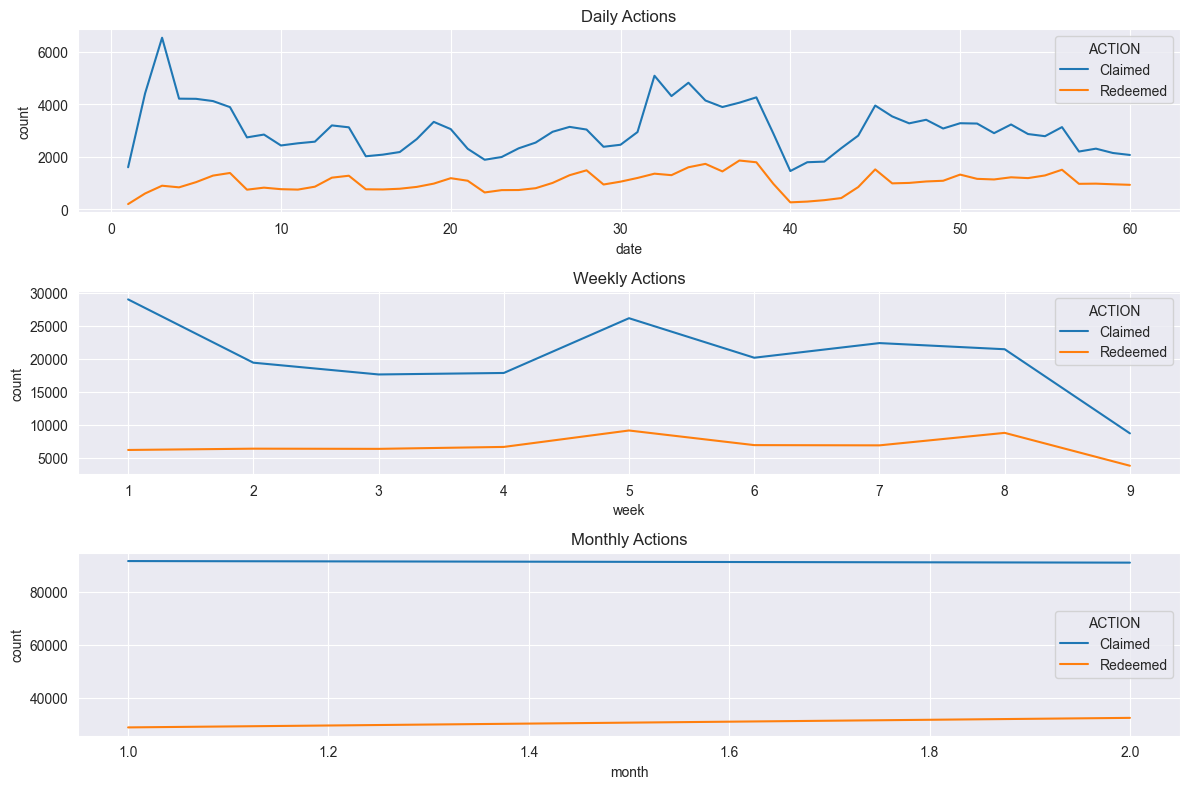

In [64]:
# Group the data by date, week, and month and count actions
daily_data = sub_df.groupby(['date','ACTION']).size().reset_index(name = 'count')
weekly_data = sub_df.groupby(['week','ACTION']).size().reset_index(name = 'count')
monthly_data = sub_df.groupby(['month','ACTION']).size().reset_index(name = 'count')

# Create the plots
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.lineplot(data=daily_data, x='date', y ='count', hue='ACTION')
plt.title('Daily Actions')

plt.subplot(3, 1, 2)
sns.lineplot(data=weekly_data, x='week', y ='count', hue='ACTION')
plt.title('Weekly Actions')

plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_data, x='month', y ='count', hue='ACTION')
plt.title('Monthly Actions')

plt.tight_layout()
plt.show()

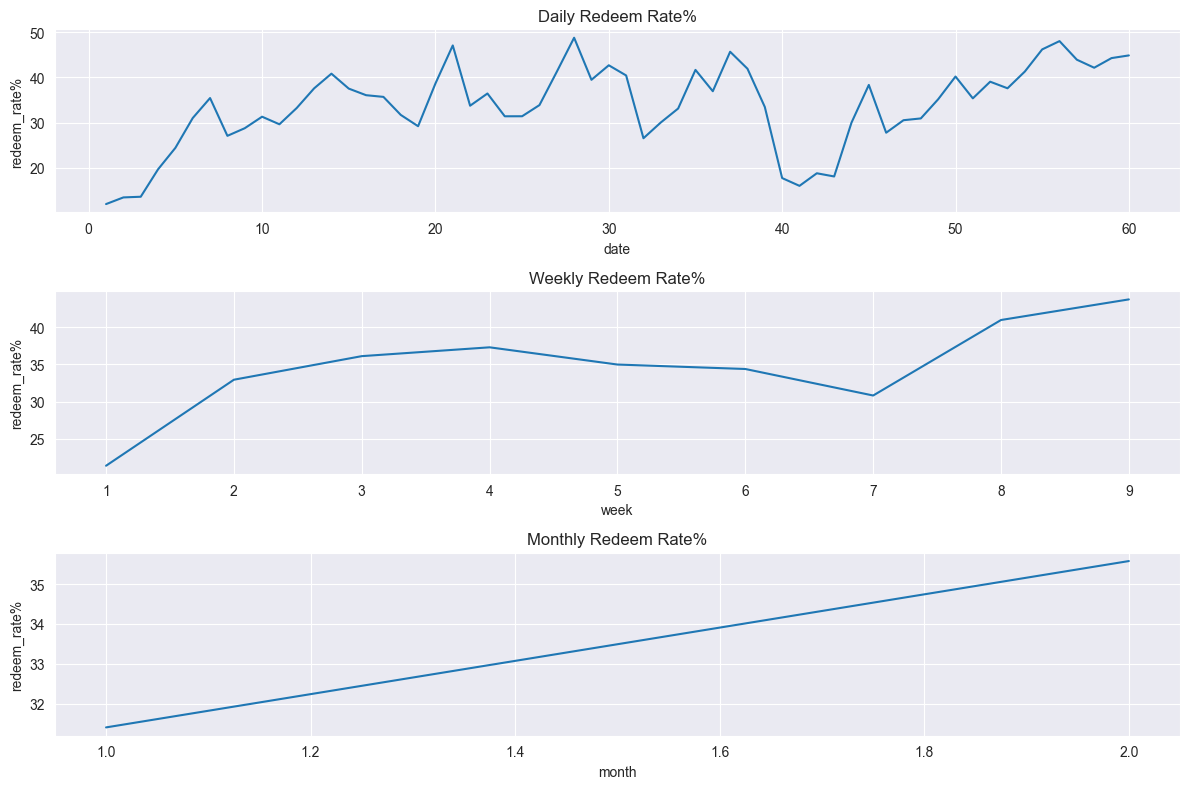

In [75]:
pv_daily_data = daily_data.pivot_table(index='date', columns='ACTION', values='count', fill_value=0)
pv_weekly_data = weekly_data.pivot_table(index='week', columns='ACTION', values='count', fill_value=0)
pv_monthly_data = monthly_data.pivot_table(index='month', columns='ACTION', values='count', fill_value=0)


pv_daily_data['redeem_rate%'] = pv_daily_data['Redeemed']*100/pv_daily_data['Claimed']
pv_weekly_data['redeem_rate%'] = pv_weekly_data['Redeemed']*100/pv_weekly_data['Claimed']
pv_monthly_data['redeem_rate%'] = pv_monthly_data['Redeemed']*100/pv_monthly_data['Claimed']
#daily_data.merge(pv_daily_data.reset_index()[['date','redeem_rate%']], on = 'date', how='left')


# Create the plots
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.lineplot(data=pv_daily_data, x='date', y ='redeem_rate%')
plt.title('Daily Redeem Rate%')

plt.subplot(3, 1, 2)
sns.lineplot(data=pv_weekly_data, x='week', y ='redeem_rate%')
plt.title('Weekly Redeem Rate%')

plt.subplot(3, 1, 3)
sns.lineplot(data=pv_monthly_data, x='month', y ='redeem_rate%')
plt.title('Monthly Redeem Rate%')

plt.tight_layout()
plt.show()

In [76]:
summary_table

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%,org_rng_min,org_rng_max,lst_rng_min,last_rng_max,quantile_50,quantile_70,quantile_90,str_min_len,str_max_len,freq_value,freq_cnt,%freq
0,TRANSACTION_ID,fact,10,303943,0,0,int64,int64,int64,0,0.0000,0.0000,0.0000,303943,100.0000,303943.0000,100.0000,1,440442,1,440442,220045.0000,308149.4000,396389.8000,NaN,NaN,NaN,NaN,NaN
1,SERIAL_NUMBER,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,210814,69.3597,210814.0000,69.3597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,21.0000,ONIDUK978,4.0000,0.0013
2,VOUCHER_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,266,0.0875,266.0000,0.0875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,46.0000,MA_HIGHLANDS_02012024_SF4406,27262.0000,8.9694
3,VOUCHER_NAME,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,254,0.0836,254.0000,0.0836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0000,59.0000,"Giảm 29,000đ cho hóa đơn từ 119,000đ",46952.0000,15.4476
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,93,0.0306,93.0000,0.0306,2020-09-12 14:34:00,2024-02-06 10:00:00,2020-09-12 14:34:00,2024-02-06 10:00:00,2024-01-02 10:00:00,2024-01-19 10:00:00,2024-02-01 10:00:00,NaN,NaN,NaN,NaN,NaN
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,62,0.0204,62.0000,0.0204,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-02-29 23:59:00,2024-05-20 23:59:00,2024-12-31 23:59:00,NaN,NaN,NaN,NaN,NaN
6,MERCHANT_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,84,0.0276,84.0000,0.0276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0000,20.0000,HIGHLANDS,127476.0000,41.9408
7,ACTION,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,2,0.0007,2.0000,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0000,8.0000,Claimed,209345.0000,68.8764
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,60,0.0197,60.0000,0.0197,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-01-31 00:00:00,2024-02-10 00:00:00,2024-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN
9,USER_ID,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,50861,16.7337,50861.0000,16.7337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,8.0000,2e2f79,334.0000,0.1099


In [78]:
sub_df.groupby(['category','ACTION']).count()

TRANSACTION_ID  VOUCHER_CODE  MERCHANT_CODE  CALENDAR_DIM_ID  USER_ID  total_stock  discount_type  discount_amount  discount_percent  sub_category  gender  region_name     age    year   month    week    date
category                      ACTION                                                                                                                                                                                                                   
Dịch vụ tài chính             Claimed               16            16             16               16       16           16             16               16                16            16      16           16      16      16      16      16      16
                              Redeemed               1             1              1                1        1            1              1                1                 1             1       1            1       1       1       1       1       1
Giáo dục                      Claimed              735           735            735              735      735          735            735              735               735           735     735          735     735     735     735     735     735
                              Redeemed              81            81             81               81       81           81             81               81                81            81      81           81      81      81      81      81      81
Khác                          Claimed              638           638            638              638      638          638            638              638               638           638     638          638     638     638     638     638     638
                              Redeemed             179           179            179              179      179          179            179              179               179           179     179          179     179     179     179     179     179
Mẹ & bé                       Claimed               71            71             71               71       71           71             71               71                71            71      71           71      71      71      71      71      71
                              Redeemed               7             7              7                7        7            7              7                7                 7             7       7            7       7       7       7       7       7
NaN                           Claimed                1             1              1                1        1            1              0                0                 0             1       1            1       1       1       1       1       1
                              Redeemed              16            16             16               16       16           16              0                0                 0            16      16           16      16      16      16      16      16
Nhà cửa - Đời sống            Claimed             6539          6539           6539             6539     6539         6539           6539             6539              6539          6539    6539         6539    6539    6539    6539    6539    6539
                              Redeemed            2449          2449           2449             2449     2449         2449           2449             2449              2449          2449    2449         2449    2449    2449    2449    2449    2449
Sức khỏe - Làm đẹp            Claimed             8252          8252           8252             8252     8252         8252           8252             8252              8252          8252    8252         8252    8252    8252    8252    8252    8252
                              Redeemed            1108          1108           1108             1108     1108         1108           1108             1108              1108          1108    1108         1108    1108    1108    1108    1108    1108
Thương mại điện tử            Claimed                3             3    

In [80]:
sub_df.ACTION.

ACTION
Claimed     182612
Redeemed     61150
Name: count, dtype: int64

In [81]:
61150/182612

0.334862988193547

In [27]:
main_df.groupby(['CALENDAR_DIM_ID','ACTION']).count()[['TRANSACTION_ID']]

TRANSACTION_ID
CALENDAR_DIM_ID ACTION                  
2024-01-01      Claimed             1596
                Redeemed             192
2024-01-02      Claimed             4415
                Redeemed             596
2024-01-03      Claimed             6536
...                                  ...
2024-02-27      Redeemed             971
2024-02-28      Claimed             2140
                Redeemed             947
2024-02-29      Claimed             2065
                Redeemed             926

[120 rows x 1 columns]

In [19]:
# Portfolio Overall (Cummulative all overtime) - Only metrics displayable is those of voucher